<a href="https://colab.research.google.com/github/Mateusz-best-creator/Learning_PyTorch/blob/main/PyTorch_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Custom Datasets

## Device Agnostic Code

In [ ]:
import torch

print(torch.__version__)
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device: {device}")

2.3.1+cu121
Device: cpu


## Get Data

In [ ]:
import requests
import zipfile
from pathlib import Path

# Setup path to a data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
  print(f"The {image_path} arleady exist")
else:
  print(f"{image_path} does not exist, creating one...")
  image_path.mkdir(parents=True,
                   exist_ok=True)
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  url = "https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip"
  request = requests.get(url)
  print(f"Downloading data from: {url}")
  f.write(request.content)

# Unzip data
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  print(f"Unzipping data...")
  zip_ref.extractall(image_path)



The data/pizza_steak_sushi arleady exist
Unzipping data...


## Becoming One With The Data

In [ ]:
import os

def walk_through_dir(dir_path):
  """Walks through dir_path and return it's content."""
  for root, dirs, files in os.walk(dir_path):
    print(f"There are {len(dirs)} directories, {len(files)} files of images in {root}.")

walk_through_dir("data/pizza_steak_sushi")

There are 2 directories, 0 files of images in data/pizza_steak_sushi.
There are 3 directories, 0 files of images in data/pizza_steak_sushi/test.
There are 0 directories, 19 files of images in data/pizza_steak_sushi/test/steak.
There are 0 directories, 31 files of images in data/pizza_steak_sushi/test/sushi.
There are 0 directories, 25 files of images in data/pizza_steak_sushi/test/pizza.
There are 3 directories, 0 files of images in data/pizza_steak_sushi/train.
There are 0 directories, 75 files of images in data/pizza_steak_sushi/train/steak.
There are 0 directories, 72 files of images in data/pizza_steak_sushi/train/sushi.
There are 0 directories, 78 files of images in data/pizza_steak_sushi/train/pizza.


In [ ]:
train_dir = image_path / "train"
test_dir = image_path / "test"

print(f"\nTrain:")
walk_through_dir(train_dir)
print(f"\n\nTest:")
walk_through_dir(test_dir)


Train:
There are 3 directories, 0 files of images in data/pizza_steak_sushi/train.
There are 0 directories, 75 files of images in data/pizza_steak_sushi/train/steak.
There are 0 directories, 72 files of images in data/pizza_steak_sushi/train/sushi.
There are 0 directories, 78 files of images in data/pizza_steak_sushi/train/pizza.


Test:
There are 3 directories, 0 files of images in data/pizza_steak_sushi/test.
There are 0 directories, 19 files of images in data/pizza_steak_sushi/test/steak.
There are 0 directories, 31 files of images in data/pizza_steak_sushi/test/sushi.
There are 0 directories, 25 files of images in data/pizza_steak_sushi/test/pizza.


### Visualizing An Image

In [ ]:
import random
from PIL import Image

# Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list[:10]

[PosixPath('data/pizza_steak_sushi/test/steak/1868005.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/3873283.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/1285886.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/502076.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/894825.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/3424937.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/2117351.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/690177.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/100274.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/673127.jpg')]

Height = 382 | Width = 512


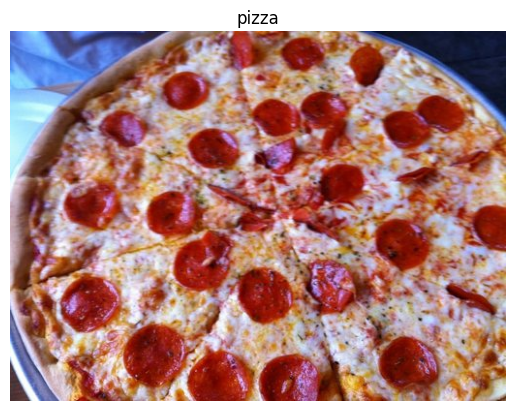

In [ ]:
import matplotlib.pyplot as plt
random_path = random.choice(image_path_list)
image_class = random_path.parent.stem
img = Image.open(random_path)

print(f"Height = {img.height} | Width = {img.width}")

plt.title(image_class)
plt.imshow(img)
plt.axis("off")
plt.show()

## Transforming The Data

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.transforms import v2

### Transforming data with `torchvision.transforms`

In [ ]:
data_transform = v2.Compose([v2.Resize(size=(64, 64)),
                             v2.RandomHorizontalFlip(p=0.5),
                             v2.ToTensor()])
data_transform

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


Compose(
      Resize(size=[64, 64], interpolation=InterpolationMode.BILINEAR, antialias=True)
      RandomHorizontalFlip(p=0.5)
      ToTensor()
)

In [ ]:
import numpy as np
img_transformed = data_transform(img)
img_transformed.shape, img_transformed[:2]

(torch.Size([3, 64, 64]),
 tensor([[[0.3373, 0.4157, 0.4941,  ..., 0.0588, 0.0588, 0.0588],
          [0.3333, 0.4039, 0.4627,  ..., 0.0667, 0.0667, 0.0549],
          [0.3255, 0.3686, 0.4196,  ..., 0.0706, 0.0706, 0.0549],
          ...,
          [0.3020, 0.5569, 0.7647,  ..., 0.5294, 0.7176, 0.8235],
          [0.3059, 0.4000, 0.8000,  ..., 0.6627, 0.7333, 0.8039],
          [0.2980, 0.3412, 0.6667,  ..., 0.7059, 0.7020, 0.5922]],
 
         [[0.4667, 0.6078, 0.7412,  ..., 0.0863, 0.0863, 0.0824],
          [0.4667, 0.5882, 0.6941,  ..., 0.1020, 0.0980, 0.0863],
          [0.4863, 0.5529, 0.6431,  ..., 0.1059, 0.1020, 0.0863],
          ...,
          [0.2157, 0.5176, 0.8039,  ..., 0.3020, 0.6549, 0.8471],
          [0.2039, 0.3216, 0.8235,  ..., 0.5098, 0.7137, 0.8431],
          [0.1961, 0.2353, 0.6549,  ..., 0.6157, 0.6667, 0.5059]]]))

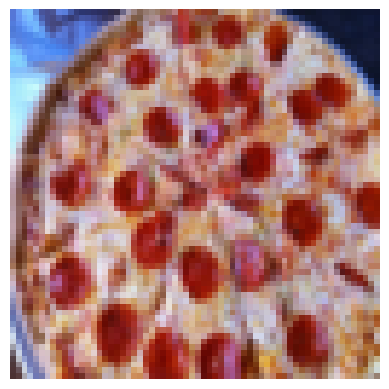

In [ ]:
plt.imshow(img_transformed.permute(1, 2, 0))
plt.axis("Off")
plt.show()

In [ ]:
random.sample(image_path_list, 3)

[PosixPath('data/pizza_steak_sushi/train/steak/1615395.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/1621763.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/887831.jpg')]

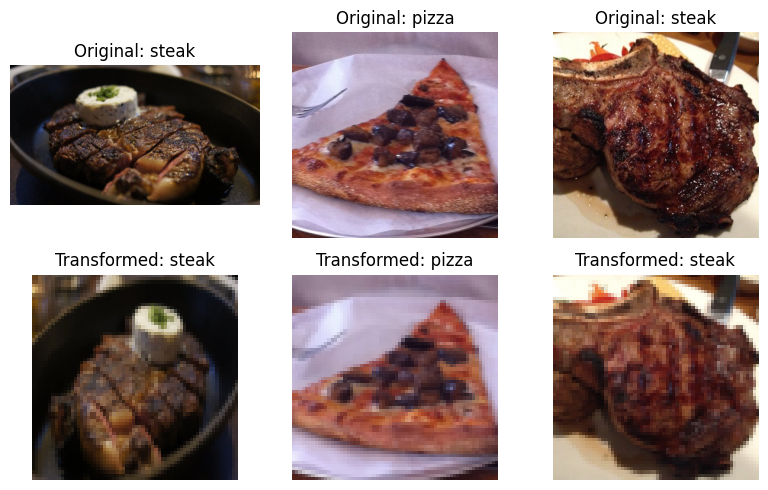

In [ ]:
def plot_transformed_images(image_paths,
                            transforms,
                            n=3):
  """Select random images from image_paths and then plots original vs transformed version."""
  random_image_paths = random.sample(image_paths, n)
  original_images = []
  transformed_images = []
  image_labels = []
  for path in random_image_paths:
    image_labels.append(path.parent.stem)
    img = Image.open(path)
    original_images.append(img)
    transformed_images.append(transforms(img).permute(1, 2, 0))

  fig = plt.figure(figsize=(8, 5))
  for i in range(n):
      # Original images
      ax = fig.add_subplot(2, n, i + 1)
      ax.imshow(original_images[i])
      ax.set_title(f"Original: {image_labels[i]}")
      ax.axis('off')

      # Transformed images
      ax = fig.add_subplot(2, n, n + i + 1)
      ax.imshow(transformed_images[i])
      ax.set_title(f"Transformed: {image_labels[i]}")
      ax.axis('off')
  plt.tight_layout()
  plt.show()

plot_transformed_images(image_path_list,
                        data_transform,
                        n=3)

## Creating Datasets using `ImageFolder`

In [ ]:
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

In [ ]:
from torchvision import datasets

train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform)
test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                  Resize(size=[64, 64], interpolation=InterpolationMode.BILINEAR, antialias=True)
                  RandomHorizontalFlip(p=0.5)
                  ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                  Resize(size=[64, 64], interpolation=InterpolationMode.BILINEAR, antialias=True)
                  RandomHorizontalFlip(p=0.5)
                  ToTensor()
            ))

In [ ]:
# Get class names as list
CLASS_NAMES = train_data.classes
print(CLASS_NAMES)

['pizza', 'steak', 'sushi']


In [ ]:
# Check the length of our dataset
len(train_data), len(test_data)

(225, 75)

## Data Loaders

In [ ]:
BATCH_SIZE = 32
train_dataloader = torch.utils.data.DataLoader(train_data,
                                               BATCH_SIZE)
test_dataloader = torch.utils.data.DataLoader(test_data,
                                               BATCH_SIZE)
print(f"Lengths: {len(train_dataloader)} | {len(test_dataloader)} | Batch Size = {BATCH_SIZE}")

Lengths: 8 | 3 | Batch Size = 32


In [ ]:
img, label = next(iter(train_dataloader))
print(img.shape, label.shape)

torch.Size([32, 3, 64, 64]) torch.Size([32])


## Loading image data with custom `Dataset`

Functionalities that we need:
1. Want to be able to load images from file.
2. Want to be able to get class names from the dataset.
3. Want to be able to get classes as dictionary from the dataset.

In [ ]:
import os
import pathlib
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [ ]:
# We want to replicate this:
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### Creating helper function to get class names

In [ ]:
target_directory = train_dir
print(f"Target Directory: {target_directory}")

# Get the class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

Target Directory: data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [ ]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
  """Finds the class folder names in a target directory."""
  class_names = sorted([entry.name for entry in list(os.scandir(target_directory))])

  if not class_names:
    raise FileNotFoundError("STH is wrong with your directory structure...")

  class_names_dictionary = {}
  for idx, name in enumerate(class_names):
    class_names_dictionary[name] = idx
  return class_names, class_names_dictionary

find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### Create a custom dataset to replicate `ImageFolder`

In [ ]:
# Write a custom dataset class

class ImageFolderCustom(Dataset):

  def __init__(self,
               target_directory: str,
               transform: transforms.Compose = None):
    super().__init__()
    # Create Attributes
    self.paths = list(pathlib.Path(target_directory).glob("*/*.jpg"))
    self.transform = transform
    self.classes, self.class_to_idx = find_classes(target_directory)

  def load_image(self, index: int):
    return Image.open(self.paths[index])

  def __len__(self) -> int:
    return len(self.paths)

  def __getitem__(self, index: int):
    img = self.load_image(index)
    class_name = self.paths[index].parent.name
    class_idx = self.class_to_idx[class_name]

    if self.transform:
      img = self.transform(img)
    return img, class_idx # (X, y)

In [ ]:
from torchvision import transforms
# Create some custom data transformations

# Augment train data
train_transforms = transforms.Compose([transforms.Resize(size=(64, 64)),
                               transforms.RandomHorizontalFlip(p=0.5),
                               transforms.ToTensor()])
# Do not augment test data, only resize
test_transforms = transforms.Compose([transforms.Resize(size=(64, 64)),
                              transforms.ToTensor()])

# Create custom datasets
train_data_custom = ImageFolderCustom(train_dir,
                                      train_transforms)
test_data_custom = ImageFolderCustom(test_dir,
                                     test_transforms)
# Check if worker
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7b30e9d63e20>,
 <__main__.ImageFolderCustom at 0x7b30e9d62ad0>)

In [ ]:
train_data_custom[0]

(tensor([[[0.0980, 0.0980, 0.0941,  ..., 0.0118, 0.0157, 0.0196],
          [0.0980, 0.0980, 0.0941,  ..., 0.0157, 0.0235, 0.0275],
          [0.0980, 0.0980, 0.0980,  ..., 0.0157, 0.0235, 0.0353],
          ...,
          [0.0039, 0.0039, 0.0000,  ..., 0.0000, 0.0039, 0.0078],
          [0.0039, 0.0000, 0.0000,  ..., 0.0039, 0.0039, 0.0000],
          [0.0039, 0.0000, 0.0000,  ..., 0.0039, 0.0000, 0.0000]],
 
         [[0.0549, 0.0549, 0.0510,  ..., 0.0078, 0.0078, 0.0118],
          [0.0549, 0.0549, 0.0510,  ..., 0.0118, 0.0157, 0.0157],
          [0.0549, 0.0549, 0.0549,  ..., 0.0118, 0.0196, 0.0196],
          ...,
          [0.0039, 0.0039, 0.0000,  ..., 0.0000, 0.0039, 0.0078],
          [0.0039, 0.0000, 0.0000,  ..., 0.0039, 0.0039, 0.0000],
          [0.0039, 0.0000, 0.0000,  ..., 0.0039, 0.0000, 0.0000]],
 
         [[0.0471, 0.0471, 0.0431,  ..., 0.0118, 0.0118, 0.0157],
          [0.0471, 0.0471, 0.0431,  ..., 0.0118, 0.0157, 0.0157],
          [0.0471, 0.0471, 0.0471,  ...,

In [ ]:
print(f"Lengths = {len(train_data_custom)} | {len(test_data_custom)}")
print(f"Train Classes = {train_data_custom.classes} | {train_data_custom.class_to_idx}")
print(f"Test Classes = {test_data_custom.classes} | {test_data_custom.class_to_idx}")

Lengths = 225 | 75
Train Classes = ['pizza', 'steak', 'sushi'] | {'pizza': 0, 'steak': 1, 'sushi': 2}
Test Classes = ['pizza', 'steak', 'sushi'] | {'pizza': 0, 'steak': 1, 'sushi': 2}


In [ ]:
# Check for equality amongst our custom Dataset and ImageFolder Dataset
print((len(train_data_custom) == len(train_data)) & (len(test_data_custom) == len(test_data)))
print(train_data_custom.classes == train_data.classes)
print(train_data_custom.class_to_idx == train_data.class_to_idx)

True
True
True


### Visualizing random images

In [ ]:
# 1. Take in a Dataset as well as a list of class names
def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True):

    if n > 10:
        n = 10
        display_shape = False
        print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")

    random_samples_idx = random.sample(range(len(dataset)), k=n)
    plt.figure(figsize=(15, 5))

    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]
        targ_image_adjust = targ_image.permute(1, 2, 0)
        # Plot adjusted samples
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classes:
            title = f"class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)

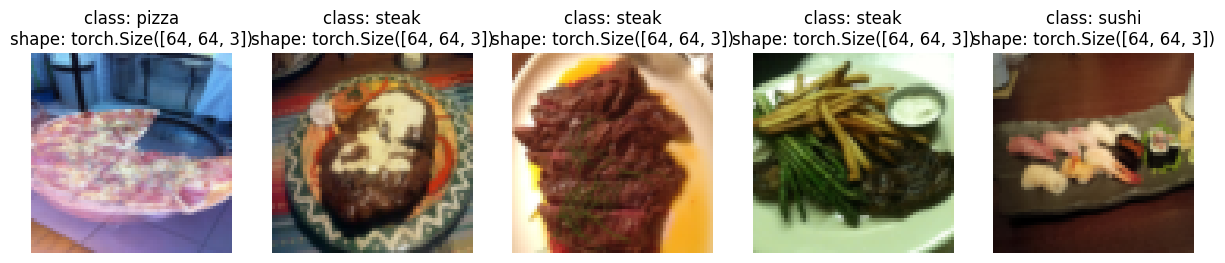

In [ ]:
# Display random images from ImageFolder created Dataset
display_random_images(train_data,
                      n=5,
                      classes=CLASS_NAMES)

For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.


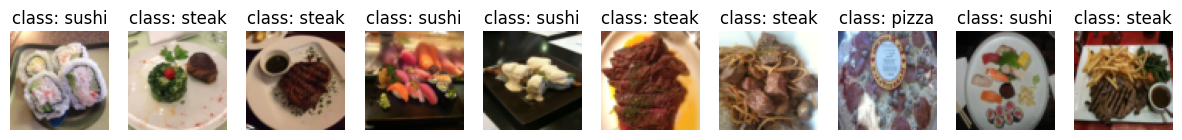

In [ ]:
# Display random images from ImageFolderCustom Dataset
display_random_images(train_data_custom,
                      n=12,
                      classes=CLASS_NAMES)

### Turn Images Into DataLoaders

In [ ]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)
# Check the shapes
train_batch = next(iter(train_dataloader))
train_img, train_label = train_batch
print(f"Batched image shape: {train_img.shape}")
print(f"Batched label shape: {train_label.shape}")

Batched image shape: torch.Size([32, 3, 64, 64])
Batched label shape: torch.Size([32])


## Data Augmentation

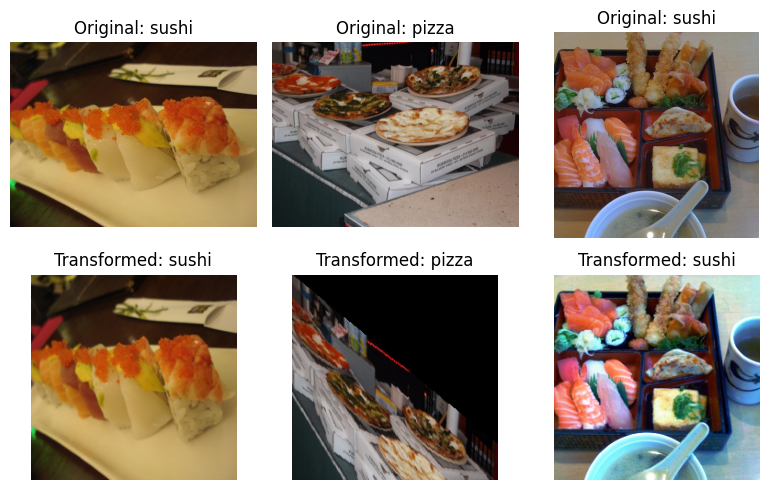

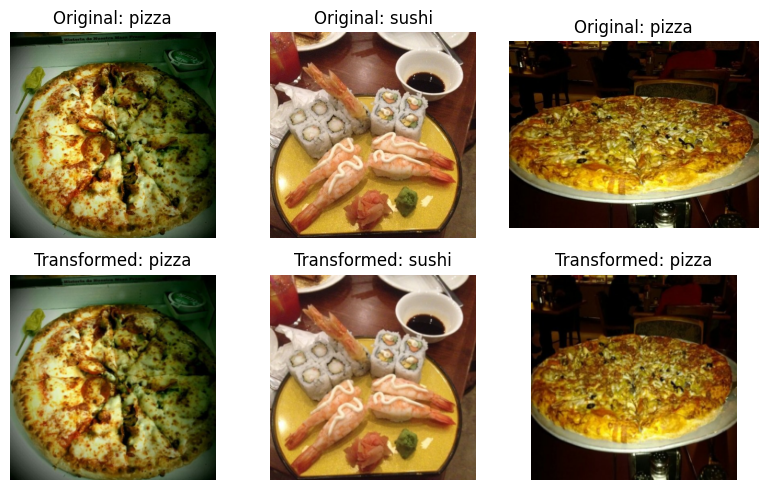

In [ ]:
train_transforms = transforms.Compose([transforms.Resize(size=(224, 224)),
                                       transforms.TrivialAugmentWide(),
                                       transforms.ToTensor()])
test_transforms = transforms.Compose([transforms.Resize(size=(224, 224)),
                                      transforms.ToTensor()])
train_paths = list(pathlib.Path("data/pizza_steak_sushi/train").glob("*/*.jpg"))
test_paths = list(pathlib.Path("data/pizza_steak_sushi/test").glob("*/*.jpg"))
plot_transformed_images(image_paths=train_paths,
                        transforms=train_transforms)
plot_transformed_images(image_paths=test_paths,
                        transforms=test_transforms)

## Creating `simple_transform` and loading data for first model

In [ ]:
from torchvision.datasets import ImageFolder
simple_transform = transforms.Compose([transforms.Resize(size=(64, 64)),
                                       transforms.ToTensor()])
# Loading from folders
train_data_sample = ImageFolder(root=train_dir,
                                transform=simple_transform)
test_data_sample = ImageFolder(root=test_dir,
                               transform=simple_transform)
# Turining into dataloaders
train_dataloader_simple = DataLoader(train_data_sample,
                                      BATCH_SIZE,
                                      shuffle=True,
                                      num_workers=os.cpu_count())
test_dataloader_simple = DataLoader(test_data_sample,
                                    BATCH_SIZE)
train_dataloader_simple, test_dataloader_simple

(<torch.utils.data.dataloader.DataLoader at 0x7b30e966f280>,
 <torch.utils.data.dataloader.DataLoader at 0x7b30e99c4760>)

### Building TinyVGG model

In [ ]:
from torch import nn

class TinyVGG(nn.Module):

  def __init__(self,
               input_shape,
               hidden_units,
               output_shape):
    super().__init__()
    self.block_1 = nn.Sequential(
        nn.Conv2d(input_shape, hidden_units, 3, 1, 1),
        nn.ReLU(),
        nn.Conv2d(hidden_units, hidden_units, 3, 1, 1),
        nn.ReLU(),
        nn.MaxPool2d(2))
    self.block_2 = nn.Sequential(
        nn.Conv2d(hidden_units, hidden_units, 3, 1, 1),
        nn.ReLU(),
        nn.Conv2d(hidden_units, hidden_units, 3, 1, 1),
        nn.ReLU(),
        nn.MaxPool2d(2))
    self.classification = nn.Sequential(nn.Flatten(),
                                        # 64 / 2 / 2 = 16
                                        nn.Linear(hidden_units * 16 * 16, output_shape))
  def forward(self, x):
    x = self.block_1(x)
    # print(x.shape)
    x = self.block_2(x)
    # print(x.shape)
    return self.classification(x)

In [ ]:
model_0 = TinyVGG(3, # number of color channels
                  10, # number of filters
                  3).to(device) # Pizza, steak and sushi
model_0

TinyVGG(
  (block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classification): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [ ]:
# Let's check if it works for some image
img_batch, label_batch = next(iter(train_dataloader_simple))
img, label = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(img.shape, label)
model_0.eval()
with torch.inference_mode():
  logit = model_0(img)
proba = torch.nn.functional.softmax(logit, dim=1)
CLASSES = train_data.classes
print(f"Predicted class: {CLASSES[proba.argmax(dim=1)]}")

torch.Size([1, 3, 64, 64]) tensor(2)
Predicted class: steak


In [ ]:
try:
  from torchsummary import summary
except:
  !pip install torchsummary
  from torchsummary import summary
summary(model_0, (3, 64, 64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 64, 64]             280
              ReLU-2           [-1, 10, 64, 64]               0
            Conv2d-3           [-1, 10, 64, 64]             910
              ReLU-4           [-1, 10, 64, 64]               0
         MaxPool2d-5           [-1, 10, 32, 32]               0
            Conv2d-6           [-1, 10, 32, 32]             910
              ReLU-7           [-1, 10, 32, 32]               0
            Conv2d-8           [-1, 10, 32, 32]             910
              ReLU-9           [-1, 10, 32, 32]               0
        MaxPool2d-10           [-1, 10, 16, 16]               0
          Flatten-11                 [-1, 2560]               0
           Linear-12                    [-1, 3]           7,683
Total params: 10,693
Trainable params: 10,693
Non-trainable params: 0
---------------------------------

## Train and test loops

In [ ]:
def train_step(model,
               optimizer,
               loss_fn,
               train_dataloader,
               device):
  model.train()
  train_loss = 0
  train_accuracy = 0

  # Loop through data
  for batch, (X, y) in enumerate(train_dataloader):
    X, y = X.to(device), y.to(device)

    logits = model(X)
    loss = loss_fn(logits, y)
    preds = torch.nn.functional.softmax(logits, dim=1).argmax(dim=1)
    accuracy = (preds == y).sum().item() / len(y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Accumulate metrics
    train_loss += loss
    train_accuracy += accuracy

  train_loss /= len(train_dataloader)
  train_accuracy /= len(train_dataloader)
  return train_loss, train_accuracy

def test_step(model,
              loss_fn,
              test_dataloader,
              device):
  model.eval()
  test_accuracy = 0
  test_loss = 0
  with torch.inference_mode():
    for batch, (X, y) in enumerate(test_dataloader):
      X, y = X.to(device), y.to(device)
      logits = model(X)
      test_loss += loss_fn(logits, y)
      preds = torch.nn.functional.softmax(logits, dim=1).argmax(dim=1)
      test_accuracy += (preds == y).sum().item() / len(y)

    test_accuracy /= len(test_dataloader)
    test_loss /= len(test_dataloader)
  return test_loss, test_accuracy

EPOCHS = 10
def train(epochs,
          model,
          optimizer,
          loss_fn,
          train_dataloader,
          test_dataloader,
          device):
  """
  Combines train_step and test_step functions and train and evaluate the model for given number of epochs.
  """

  # Create empty results dictionary
  results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
  }

  for epoch in range(epochs):
    train_loss, train_accuracy = train_step(model,
                                            optimizer,
                                            loss_fn,
                                            train_dataloader,
                                            device)
    test_loss, test_accuracy = test_step(model,
                                         loss_fn,
                                         test_dataloader,
                                         device)
    results["train_loss"].append(train_loss.item())
    results["train_acc"].append(train_accuracy)
    results["test_loss"].append(test_loss.item())
    results["test_acc"].append(test_accuracy)
    print(f"Epoch = {epoch}")
    print(f"Training = {train_loss:.4f} | {train_accuracy:.4f} | Testing = {test_loss:.4f} | {test_accuracy:.4f}")
  return results

In [ ]:
optimizer = torch.optim.SGD(model_0.parameters())
loss_fn = torch.nn.CrossEntropyLoss()

EPOCHS = 20
model_0_results = train(EPOCHS,
                        model_0,
                        optimizer,
                        loss_fn,
                        train_dataloader_simple,
                        test_dataloader_simple,
                        device)
model_0_results

### Visualizing training progress

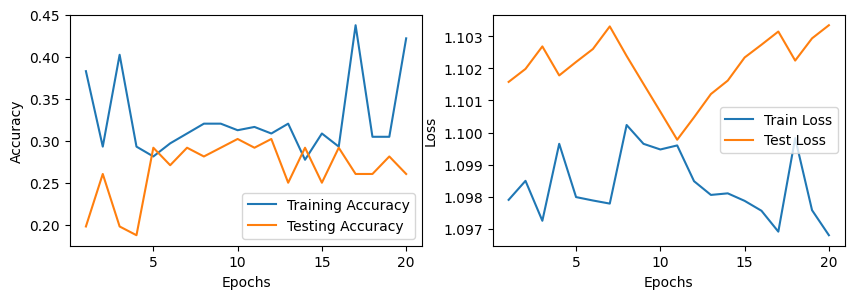

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 3))
epochs = torch.arange(EPOCHS) + 1

# First subplot for accuracy
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, model_0_results["train_acc"], label="Training Accuracy")
ax1.plot(epochs, model_0_results["test_acc"], label="Testing Accuracy")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Accuracy")
ax1.legend()

# Second subplot for loss
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, model_0_results["train_loss"], label="Train Loss")
ax2.plot(epochs, model_0_results["test_loss"], label="Test Loss")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Loss")
ax2.legend()

plt.show()

### Train transform with data augmentation

In [ ]:
train_transform_trivial_agument = transforms.Compose([transforms.Resize(size=(64, 64)),
                                                      transforms.TrivialAugmentWide(),
                                                      transforms.ToTensor()])
test_transform_trivial_agument = transforms.Compose([transforms.Resize(size=(64, 64)),
                                                      transforms.ToTensor()])
# Loading from folders
train_data_augmented = ImageFolder(root=train_dir,
                                transform=train_transform_trivial_agument)
test_data_augmented = ImageFolder(root=test_dir,
                               transform=test_transform_trivial_agument)
# Turining into dataloaders
train_dataloader_augmented = DataLoader(train_data_augmented,
                                      BATCH_SIZE,
                                      shuffle=True,
                                      num_workers=os.cpu_count())
test_dataloader_augmented = DataLoader(test_data_augmented,
                                    BATCH_SIZE)
train_dataloader_augmented, test_dataloader_augmented

(<torch.utils.data.dataloader.DataLoader at 0x7b30e98906d0>,
 <torch.utils.data.dataloader.DataLoader at 0x7b30e98913c0>)

In [ ]:
model_1 = TinyVGG(3, 10, 3).to(device)
optimizer = torch.optim.SGD(model_1.parameters(),
                            momentum=0.9,
                            nesterov=True)
loss_fn = torch.nn.CrossEntropyLoss()
model_1_results = train(EPOCHS,
                        model_1,
                        optimizer,
                        loss_fn,
                        train_dataloader_augmented,
                        test_dataloader_augmented,
                        device)

Epoch = 0
Training = 1.1025 | 0.2812 | Testing = 1.0923 | 0.5417
Epoch = 1
Training = 1.0993 | 0.2539 | Testing = 1.0970 | 0.6051
Epoch = 2
Training = 1.1014 | 0.2969 | Testing = 1.0936 | 0.5417
Epoch = 3
Training = 1.0978 | 0.4180 | Testing = 1.0970 | 0.2604
Epoch = 4
Training = 1.1026 | 0.3047 | Testing = 1.1038 | 0.2604
Epoch = 5
Training = 1.0926 | 0.4258 | Testing = 1.1111 | 0.2604
Epoch = 6
Training = 1.1004 | 0.3047 | Testing = 1.1175 | 0.2604
Epoch = 7
Training = 1.0905 | 0.4258 | Testing = 1.1239 | 0.2604
Epoch = 8
Training = 1.0884 | 0.4258 | Testing = 1.1294 | 0.2604
Epoch = 9
Training = 1.1011 | 0.3047 | Testing = 1.1328 | 0.2604
Epoch = 10
Training = 1.1141 | 0.3047 | Testing = 1.1322 | 0.2604
Epoch = 11
Training = 1.0979 | 0.3047 | Testing = 1.1247 | 0.2604
Epoch = 12
Training = 1.0920 | 0.4258 | Testing = 1.1245 | 0.2604
Epoch = 13
Training = 1.0909 | 0.4258 | Testing = 1.1257 | 0.2604
Epoch = 14
Training = 1.1091 | 0.3047 | Testing = 1.1242 | 0.2604
Epoch = 15
Training 

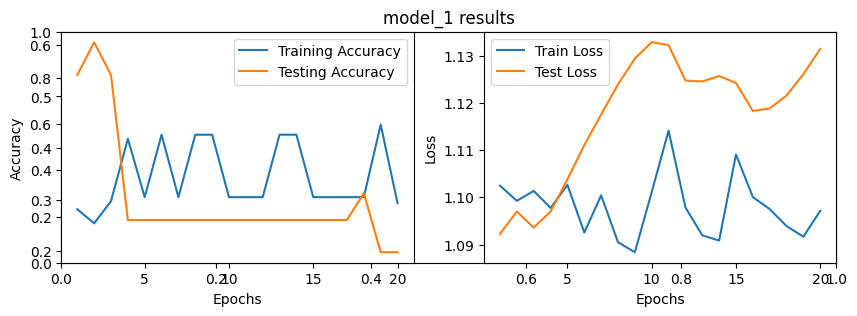

In [ ]:
fig = plt.figure(figsize=(10, 3))
epochs = torch.arange(EPOCHS) + 1

# First subplot for accuracy
plt.title("model_1 results")
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, model_1_results["train_acc"], label="Training Accuracy")
ax1.plot(epochs, model_1_results["test_acc"], label="Testing Accuracy")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Accuracy")
ax1.legend()

# Second subplot for loss
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, model_1_results["train_loss"], label="Train Loss")
ax2.plot(epochs, model_1_results["test_loss"], label="Test Loss")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Loss")
ax2.legend()

plt.show()

## Compare model results

In [ ]:
import pandas as pd

model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_1_df

,train_loss,train_acc,test_loss,test_acc
0,1.102470,0.281250,1.092286,0.541667
1,1.099274,0.253906,1.097007,0.605114
2,1.101369,0.296875,1.093615,0.541667
3,1.097762,0.417969,1.096994,0.260417
4,1.102642,0.304688,1.103816,0.260417
5,1.092557,0.425781,1.111063,0.260417
6,1.100416,0.304688,1.117531,0.260417
7,1.090512,0.425781,1.123895,0.260417
8,1.088398,0.425781,1.129374,0.260417
9,1.101123,0.304688,1.132820,0.260417


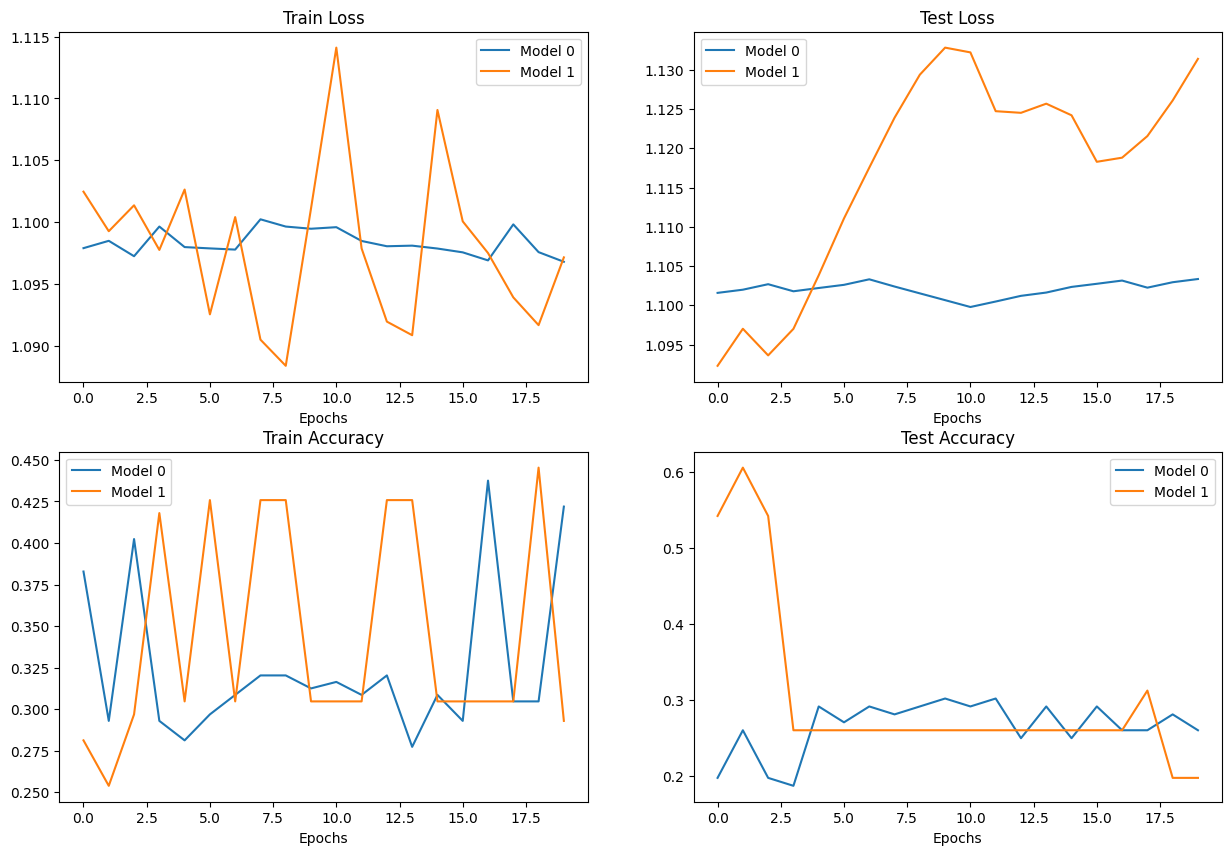

In [ ]:
# Setup a plot
plt.figure(figsize=(15, 10))

# Get number of epochs
epochs = range(len(model_0_df))

# Plot train loss
plt.subplot(2, 2, 1)
plt.plot(epochs, model_0_df["train_loss"], label="Model 0")
plt.plot(epochs, model_1_df["train_loss"], label="Model 1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot test loss
plt.subplot(2, 2, 2)
plt.plot(epochs, model_0_df["test_loss"], label="Model 0")
plt.plot(epochs, model_1_df["test_loss"], label="Model 1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot train accuracy
plt.subplot(2, 2, 3)
plt.plot(epochs, model_0_df["train_acc"], label="Model 0")
plt.plot(epochs, model_1_df["train_acc"], label="Model 1")
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.legend()

# Plot test accuracy
plt.subplot(2, 2, 4)
plt.plot(epochs, model_0_df["test_acc"], label="Model 0")
plt.plot(epochs, model_1_df["test_acc"], label="Model 1")
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.legend();

## Make prediction on a custom image

In [ ]:
import requests

url = "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg"

custom_image_path = Path("data/pizza.jpeg")
if custom_image_path.is_file():
  print(f"Data from this url {url} is arleady downloaded...")
else:
  try:
    request = requests.get(url)
    print(f"Downloading data from {url}")
    with open(custom_image_path, "wb") as f:
      f.write(request.content)
  except Exception as e:
    print(f"Exception while downloading the data: {e}...")

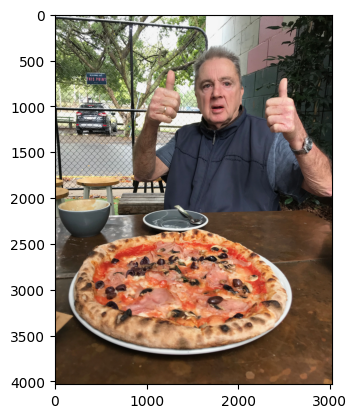

In [ ]:
import torchvision
# Read in custom image
custom_image_uint8 = Image.open(custom_image_path)
plt.imshow(custom_image_uint8)

In [ ]:
custom_image_uint8 = test_transform_trivial_agument(custom_image_uint8).unsqueeze(dim=0)
model_1.eval()
with torch.inference_mode():
  preds = torch.nn.functional.softmax(model_1(custom_image_uint8))
preds

<ipython-input-144-86ce93a28961>:4: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  preds = torch.nn.functional.softmax(model_1(custom_image_uint8))


tensor([[0.3388, 0.3580, 0.3032]])

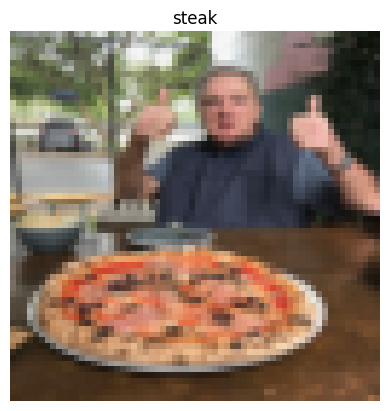

In [ ]:
plt.imshow(custom_image_uint8[0].permute(1, 2, 0))
plt.title(CLASS_NAMES[preds.argmax()])
plt.axis("off")
plt.show()

## Function to make predictions on custom images

In [ ]:
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str] = None,
                        transform=None,
                        device: torch.device = device):
    """Makes a prediction on a target image and plots the image with its prediction."""
    target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)
    target_image = target_image / 255.
    if transform:
        target_image = transform(target_image)
    model.to(device)

    model.eval()
    with torch.inference_mode():
        target_image = target_image.unsqueeze(dim=0)
        target_image_pred = model(target_image.to(device))

    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    plt.imshow(target_image.squeeze().permute(1, 2, 0)) # make sure it's the right size for matplotlib
    if class_names:
        title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    else:
        title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    plt.title(title)
    plt.axis(False);

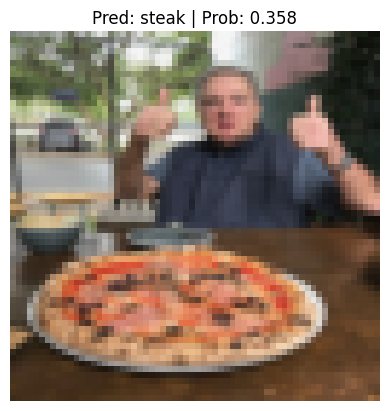

In [ ]:
custom_image_transform = transforms.Compose([transforms.Resize(size=(64, 64))])
pred_and_plot_image(model=model_1,
                    image_path=custom_image_path,
                    class_names=CLASS_NAMES,
                    transform=custom_image_transform,
                    device=device)

# Exercises

In [ ]:
import torch
from torchvision import datasets
from torchvision import transforms

train_data = datasets.FashionMNIST(root="data",
                                   train=True,
                                   download=True,
                                   transform=transforms.ToTensor())
test_data = datasets.FashionMNIST(root="data",
                                  train=False,
                                  download=True,
                                  transform=transforms.ToTensor())
train_data, test_data

100%|██████████| 26421880/26421880 [00:01<00:00, 16285318.50it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 282043.65it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 4760836.99it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 9271050.66it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

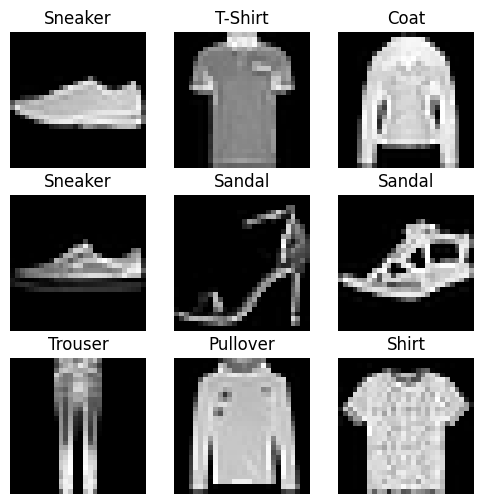

In [ ]:
import random
import matplotlib.pyplot as plt

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
fig = plt.figure(figsize=(6, 6))
cols, rows = 3, 3
for i in range(1, cols*rows+1):
  random_index = random.randint(0, len(train_data))
  img, label = train_data[random_index]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.permute(1, 2, 0), cmap="gray")
  plt.title(labels_map[label])
  plt.axis("off")
plt.show()

## Download 20% data

In [ ]:
import requests
import zipfile
from pathlib import Path

url = "https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip"
data_path = Path("data") / "pizza_steak_sushi"

if data_path.is_dir():
  print(f"Data arleady downloaded...")
else:
  request = requests.get(url)
  data_path.mkdir(parents=True,
                  exist_ok=True)
  with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
    f.write(request.content)

  with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", 'r') as zip_ref:
    zip_ref.extractall(data_path)

In [ ]:
import os

# Check exactly how many samples we have
for (root,dirs,files) in os.walk(data_path, topdown=True):
  print(f"We have {len(dirs)} directories | {len(files)} files in {root}")

We have 2 directories | 1 files in data/pizza_steak_sushi
We have 3 directories | 0 files in data/pizza_steak_sushi/test
We have 0 directories | 46 files in data/pizza_steak_sushi/test/sushi
We have 0 directories | 46 files in data/pizza_steak_sushi/test/pizza
We have 0 directories | 58 files in data/pizza_steak_sushi/test/steak
We have 3 directories | 0 files in data/pizza_steak_sushi/train
We have 0 directories | 150 files in data/pizza_steak_sushi/train/sushi
We have 0 directories | 154 files in data/pizza_steak_sushi/train/pizza
We have 0 directories | 146 files in data/pizza_steak_sushi/train/steak


In [ ]:
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

# Create data transformations
IMAGE_SIZE=224
train_data_transformations = transforms.Compose([
    transforms.Resize(size=(IMAGE_SIZE, IMAGE_SIZE)),
    transforms.TrivialAugmentWide(),
    transforms.ToTensor(),
])
test_data_transformations = transforms.Compose([
    transforms.Resize(size=(IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor(),
])

# Setup train and test paths
train_path = Path("data") / "pizza_steak_sushi" / "train"
test_path = Path("data") / "pizza_steak_sushi" / "test"

# Create datasets from image paths
train_data = ImageFolder(root=train_path,
                         transform=train_data_transformations)
test_data = ImageFolder(root=test_path,
                         transform=test_data_transformations)

# Create dataloaders
BATCH_SIZE = 32
train_dataloader = DataLoader(train_data,
                              BATCH_SIZE)
test_dataloader = DataLoader(test_data,
                              BATCH_SIZE)

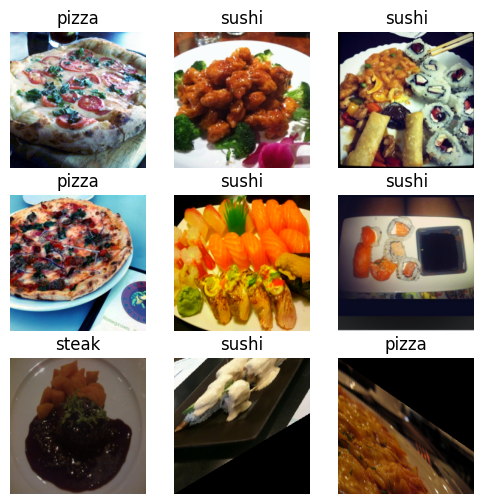

In [ ]:
import random
import matplotlib.pyplot as plt

CLASS_NAMES = train_data.classes

# Visualize some random samples
fig = plt.figure(figsize=(6, 6))
cols, rows = 3, 3
for i in range(1, cols*rows+1):
  random_idx = random.randint(0, len(train_data))
  img, label = train_data[random_idx]
  fig.add_subplot(cols, rows, i)
  plt.imshow(img.permute(1, 2, 0))
  plt.axis("off")
  plt.title(CLASS_NAMES[label])
plt.show()

## Building TinyVGG Model

In [ ]:
import torch
from torch import nn

class TinyVGG(nn.Module):

  def __init__(self,
               input_shape,
               hidden_units,
               output_shape):
    super().__init__()
    self.block_1 = nn.Sequential(
        nn.Conv2d(input_shape, hidden_units, 3, 1, 1),
        nn.ReLU(),
        nn.Conv2d(hidden_units, hidden_units, 3, 1, 1),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )
    self.block_2 = nn.Sequential(
        nn.Conv2d(hidden_units, hidden_units, 3, 1, 1),
        nn.ReLU(),
        nn.Conv2d(hidden_units, hidden_units, 3, 1, 1),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        # 224 / 2 / 2 = 56
        nn.Linear(hidden_units*56*56, output_shape)
    )

  def forward(self, x):
    x = self.block_1(x)
    # print(x.shape)
    x = self.block_2(x)
    # print(x.shape)
    return self.classifier(x)

device = "cuda" if torch.cuda.is_available() else "cpu"
model = TinyVGG(3, 64, len(CLASS_NAMES)).to(device)
print(f"Device = {device}")

Device = cuda


In [ ]:
optimizer = torch.optim.Adam(model.parameters())
loss_fn = torch.nn.CrossEntropyLoss()

EPOCHS = 10
# Use functions from above of the notebook
model_results_10_epochs = train(EPOCHS,
                        model,
                        optimizer,
                        loss_fn,
                        train_dataloader,
                        test_dataloader,
                        device)
model_results_10_epochs

Epoch = 0
Training = 7.4494 | 0.4083 | Testing = 1.2451 | 0.3500
Epoch = 1
Training = 1.3463 | 0.0875 | Testing = 1.0982 | 0.3500
Epoch = 2
Training = 1.0988 | 0.3750 | Testing = 1.0982 | 0.3500
Epoch = 3
Training = 1.0987 | 0.3750 | Testing = 1.0982 | 0.3500
Epoch = 4
Training = 1.0986 | 0.3750 | Testing = 1.0982 | 0.3500
Epoch = 5
Training = 1.0986 | 0.3750 | Testing = 1.0982 | 0.3500
Epoch = 6
Training = 1.0985 | 0.3750 | Testing = 1.0981 | 0.3500
Epoch = 7
Training = 1.0984 | 0.3750 | Testing = 1.0981 | 0.3500
Epoch = 8
Training = 1.0984 | 0.3750 | Testing = 1.0981 | 0.3500
Epoch = 9
Training = 1.0983 | 0.3750 | Testing = 1.0981 | 0.3500


{'train_loss': [7.449380397796631,
  1.346342921257019,
  1.0987637042999268,
  1.0987045764923096,
  1.0986498594284058,
  1.0985853672027588,
  1.098514199256897,
  1.0984416007995605,
  1.0983731746673584,
  1.0983015298843384],
 'train_acc': [0.4083333333333333,
  0.0875,
  0.375,
  0.375,
  0.375,
  0.375,
  0.375,
  0.375,
  0.375,
  0.375],
 'test_loss': [1.245063304901123,
  1.0982130765914917,
  1.0981768369674683,
  1.0981608629226685,
  1.0981543064117432,
  1.0981501340866089,
  1.0981472730636597,
  1.0981453657150269,
  1.0981444120407104,
  1.098144769668579],
 'test_acc': [0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35]}

In [ ]:
custom_image_path = Path("data/pizza_steak_sushi/pizza.jpeg")
custom_image_url = "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg"

if custom_image_path.is_file():
  print(f"File is arleady downloaded")
else:
  print("Downloading the data...")
  request = requests.get(custom_image_url)
  with open(custom_image_path, "wb") as f:
    f.write(request.content)

In [ ]:
import torchvision
custom_image = torchvision.io.read_image(custom_image_path)
custom_image.shape

torch.Size([3, 4032, 3024])

In [ ]:
custom_image /= 255.
custom_data_transformations = transforms.Compose([transforms.Resize(size=(IMAGE_SIZE, IMAGE_SIZE))])
custom_image_transformed = custom_data_transformations(custom_image).unsqueeze(dim=0) # Add batch size
with torch.inference_mode():
  logits = model(custom_image_transformed)
  preds = torch.nn.functional.softmax(logits, dim=1)
print(preds)

RuntimeError: result type Float can't be cast to the desired output type Byte